### Stolen from EE Developers Group
https://groups.google.com/d/msg/google-earth-engine-developers/T5LLd-F-GFw/u4ryzBbsiWIJ

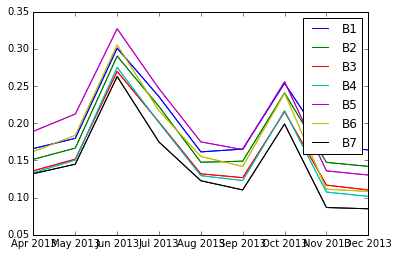

In [1]:
import ee
import matplotlib.pyplot as plt
import datetime

ee.Initialize() 

sanFrancisco = ee.Geometry.Rectangle(-122.45, 37.74, -122.4, 37.8)
landsat8Toa = ee.ImageCollection('LANDSAT/LC8_L1T_32DAY_TOA').filterDate('2011-12-25', '2013-12-25').select('B[1-7]')

def getMean(img):
    return img.reduceRegions(sanFrancisco, ee.Reducer.mean().forEachBand(img),200).makeArray(['B{0}'.format(x) for x in range(1,8)],'values')
ans = ee.FeatureCollection(landsat8Toa.map(getMean)).flatten().aggregate_array('.all').getInfo()

data = [x['properties']['values'] for x in ans]
x_ = range(0,7)
labels = ['B{0}'.format(x) for x in range(1,8)]

plt.plot(data)
plt.xticks(range(len(plt.xticks()[0])),[datetime.datetime.strptime(x['id'][:-2], "%Y%m%d").strftime('%b %Y') for x in ans])
plt.legend(plt.plot(data),['B{0}'.format(x) for x in range(1,8)])
plt.show()

### implement for Lewa

In [ ]:
lewa = ee.Geometry.Rectangle(33, -0.2, 34, 0.2)

def getMean(img):
    return img.reduceRegions(lewa, ee.Reducer.mean().forEachBand(img),200).makeArray(['B{0}'.format(x) for x in range(1,8)],'values')
ans = ee.FeatureCollection(landsat8Toa.map(getMean)).flatten().aggregate_array('.all').getInfo()

data = [x['properties']['values'] for x in ans]
x_ = range(0,7)
labels = ['B{0}'.format(x) for x in range(1,8)]

plt.plot(data)
plt.xticks(range(len(plt.xticks()[0])),[datetime.datetime.strptime(x['id'][:-2], "%Y%m%d").strftime('%b %Y') for x in ans])
plt.legend(plt.plot(data),['B{0}'.format(x) for x in range(1,8)])
plt.show()